In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [2]:
fotocasa = pd.read_csv("fotocasa.csv")

# Missing values

In [3]:
fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 > 0]/len(fotocasa)*100

Antiquity             63.226463
Bathrooms              0.712468
Community_Expenses    54.554707
Condition             50.900763
Deposit               82.900763
Elevator              27.582697
Extra                  3.094148
Floor                 31.175573
Furnished             32.386768
Heating               62.951654
Orientation           74.351145
Parking               78.137405
Pets                  93.333333
Rooms                  5.801527
Size                   0.478372
Water_Heater          69.201018
dtype: float64

In [4]:
cleaned_columns = len(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0])
print("There are ", cleaned_columns-4, " cleaned columns:")
print(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0].index)

There are  4  cleaned columns:
Index(['Emissions', 'Energy_Consumption', 'Neighborhood', 'Photos', 'Price',
       'Title', 'Type', 'url'],
      dtype='object')


# Price

In [5]:
def clean_price(x):
    if x!= "A consultar":
        return x.replace(".","").rstrip("€")
    else:
        return np.nan
fotocasa["Price"].apply(clean_price).isna().sum()

9

In [6]:
fotocasa["Price"] = fotocasa["Price"].apply(clean_price)
fotocasa = fotocasa.dropna(axis=0, subset = ["Price"])
fotocasa["Price"] = fotocasa["Price"].astype(int)

# Getting district and borough

In [7]:
districts = ["Centro","Arganzuela","Retiro","Salamanca","Chamartín","Tetuán","Chamberí","Fuencarral",
            "El Pardo","Moncloa","Latina","Carabanchel","Usera","Puente de Vallecas","Moratalaz",
            "Ciudad Lineal","Hortaleza","Villaverde","Villa de Vallecas","Vicálvaro","San Blas","Barajas"]
boroughs = ["El Pardo", "Fuentelarreina", "Peñagrande", "Pilar", "La Paz", "Valverde", "Mirasierra",
                "El Goloso", "Casa de Campo", "Argüelles", "Ciudad Universitaria", "Valdezarza", 
                "Valdemarín", "El Plantío", "Aravaca", "Bellas Vistas", "Cuatro Caminos", "Castillejos", 
                "Almenara", "Valdeacederas", "Berruguete", "Palomas", "Piovera", "Canillas", 
                "Pinar del Rey", "Apóstol Santiago", "Valdefuentes", "El Viso", "Prosperidad", 
                "Ciudad Jardín", "Hispanoamérica", "Nueva España", "Castilla", "Ventas", "Pueblo Nuevo", 
                "Quintana", "Concepción", "San Pascual", "San Juan Bautista", "Colina", "Atalaya", 
                "Costillares", "Gaztambide", "Arapiles", "Trafalgar", "Almagro", "Ríos Rosas", 
                "Vallehermoso","Recoletos", "Goya", "Fuente del Berro", "Guindalera", "Lista", 
                "Castellana", "Simancas", "Hellín", "Amposta", "Arcos", "Rosas", "Rejas", "Canillejas", 
                "Salvador", "Alameda de Osuna", "Aeropuerto", "Casco histórico de Barajas", "Timón", 
                "Corralejos", "Palacio", "Embajadores", "Cortes", "Justicia", "Universidad", "Sol", 
                "Pacífico", "Adelfas", "Estrella", "Ibiza", "Jerónimos", "Niño Jesús", "Imperial", 
                "Acacias", "Chopera", "Legazpi", "Delicias", "Palos de Moguer", "Atocha", "Pavones", 
                "Horcajo", "Marroquina", "Media Legua", "Fontarrón", "Vinateros", "Villaverde Alto", 
                "San Cristobal", "Butarque", "Los Rosales", "Los Ángeles", "Orcasitas", "Orcasur", 
                "San Fermín", "Almendrales", "Moscardó", "Zofío", "Pradolongo", "Cármenes", 
                "Puerta del Ángel", "Lucero", "Aluche", "Campamento", "Cuatro Vientos", "Águilas", 
                "Comillas", "Opañel", "San Isidro", "Vista Alegre", "Puerta Bonita", "Buenavista", 
                "Abrantes", "Casco histórico de Vicálvaro", "Valdebernardo", "Valderribas", "El Cañaveral",
                "Entrevías", "San Diego", "Palomeras Bajas", "Palomeras Sureste", "Portazgo", "Numancia",
                "Casco histórico de Vallecas", "Santa Eugenia", "Ensanche de Vallecas"]

In [8]:
from unidecode import unidecode

def get_district(x):
    comparison = [unidecode(i).lower() in unidecode(x).lower() for i in districts]
    try: 
        idx = comparison.index(True)
        return districts[idx]
    except:
        return np.nan
fotocasa["District"] = fotocasa["Neighborhood"].apply(get_district)
print("There are ", fotocasa["District"].isna().sum(), " missing value(s)")

There are  1  missing value(s)


In [9]:
def get_borough(x):
    comparison = [unidecode(i).lower() in unidecode(x).lower() for i in boroughs]
    try: 
        idx = comparison.index(True)
        return boroughs[idx]
    except:
        return np.nan
fotocasa["Borough"] = fotocasa["Title"].apply(get_borough)
print("There are ", fotocasa["Borough"].isna().sum(), " missing value(s)")

There are  306  missing value(s)


In [10]:
# Seeing missing boroughs
def clean_title(x):
    return x.split(",")[-1].split(" ")[-1]
missing_boroughs = fotocasa.loc[fotocasa["Borough"].isna(),"Title"].apply(clean_title).to_list()
missing_boroughs_dict = {}
for missing in missing_boroughs:
    if missing in missing_boroughs_dict:
        missing_boroughs_dict[missing] += 1
    else:
        missing_boroughs_dict[missing] = 1
{k: v for k, v in sorted(missing_boroughs_dict.items(), key=lambda item: item[1], reverse = True)}

{'Sanchinarro': 97,
 'Tablas': 64,
 'Manoteras': 38,
 'Villaverde': 34,
 'Montecarmelo': 20,
 'Carabanchel': 18,
 'Ambroz': 13,
 'Fresno': 11,
 'Plantío': 9,
 'Capital': 1,
 'Latina': 1}

In [11]:
def get_borough(x):
    x = x.replace("  "," ")
    if "Sanchinarro".lower() in x.lower():
        return "Valdefuentes"
    elif "Tablas".lower() in x.lower():
        return "Valverde"
    elif unidecode("San Andrés de Villaverde").lower() in unidecode(x).lower():
        return "Villaverde Alto"
    elif "Montecarmelo".lower() in x.lower():
        return "El Goloso"
    elif "Manoteras".lower() in x.lower():
        return "Apóstol Santiago"
    elif "PAU" in x:
        return "Buenavista"
    elif "Ambroz".lower() in x.lower():
        return "Casco histórico de Vicálvaro"
    elif "Arroyo del Fresno".lower() in x.lower():
        return "Mirasierra"
    else:
        comparison = [unidecode(i).lower() in unidecode(x).lower() for i in boroughs]
        try: 
            idx = comparison.index(True)
            return boroughs[idx]
        except:
            return np.nan
fotocasa["Borough"] = fotocasa["Title"].apply(get_borough)
print("There are ", fotocasa["Borough"].isna().sum(), " missing value(s)")

There are  3  missing value(s)


To see missing boroughs use the following code:

<code>idx = fotocasa[((fotocasa["Borough"].isna()) & \
                (fotocasa["Title"].apply(lambda x: "Manoteras".lower() in x.lower())))].index
fotocasa.loc[idx[0],"Title"]</code>

In [12]:
fotocasa = fotocasa.dropna(axis=0, subset = ["District","Borough"])

# Antiquity

In [13]:
fotocasa["Antiquity"].value_counts()

30 a 50 años      741
50 a 70 años      725
10 a 20 años      561
70 a 100 años     496
+ 100 años        432
20 a 30 años      319
Menos de 1 año    124
1 a 5 años        118
5 a 10 años        95
Name: Antiquity, dtype: int64

In [14]:
def clean_antiquity(x):
    try:
        return x.rstrip(" años").replace(" ","").replace("a","-").replace("Menosde","<")
    except AttributeError:
        return x
    
fotocasa["Antiquity"] = fotocasa["Antiquity"].apply(clean_antiquity)

In [15]:
fotocasa["Antiquity"].value_counts()

30-50     741
50-70     725
10-20     561
70-100    496
+100      432
20-30     319
<1        124
1-5       118
5-10       95
Name: Antiquity, dtype: int64

### Adding missing values with the average of the borough and then district

In [16]:
for borough in fotocasa.loc[fotocasa["Antiquity"].isna(),"Borough"].unique():
    filter_borough = fotocasa["Borough"] == borough
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_borough, "Antiquity"].mode().loc[0]
        fotocasa.loc[fotocasa["Antiquity"].isna() & filter_borough,"Antiquity"] = frequent_antiquity
    except KeyError:
        pass

In [17]:
for district in fotocasa.loc[fotocasa["Antiquity"].isna(),"District"].unique():
    filter_district = fotocasa["District"] == district
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_district, "Antiquity"].mode().loc[0]
        fotocasa.loc[fotocasa["Antiquity"].isna() & filter_district,"Antiquity"] = frequent_antiquity
    except KeyError:
        pass

In [18]:
fotocasa["Antiquity"].isna().sum()

0

# Bathrooms and rooms
At least one bathroom and room per property

In [19]:
fotocasa["Bathrooms"] = fotocasa["Bathrooms"].fillna(1)
fotocasa["Rooms"] = fotocasa["Rooms"].fillna(1)

# Size
We will use the average size per borough as we did with the antiquity

In [20]:
for borough in fotocasa.loc[fotocasa["Size"].isna(),"District"].unique():
    filter_borough = fotocasa["Borough"] == borough
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_borough, "Size"].mean()
        fotocasa.loc[fotocasa["Size"].isna() & filter_borough,"Size"] = frequent_antiquity
    except KeyError:
        pass

In [21]:
for district in fotocasa.loc[fotocasa["Size"].isna(),"District"].unique():
    filter_district = fotocasa["District"] == district
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_district, "Size"].mode().loc[0]
        fotocasa.loc[fotocasa["Size"].isna() & filter_district, "Size"] = frequent_antiquity
    except KeyError:
        pass

# Extras

In [22]:
all_extras = fotocasa["Extra"].fillna("").apply(lambda x: x+"-").sum().split("-")

In [23]:
extras_dict = {}
for extra in all_extras:
    if extra in extras_dict:
        extras_dict[extra] += 1
    else:
        extras_dict[extra] = 1
{k: v for k, v in sorted(extras_dict.items(), key=lambda item: item[1], reverse = True)}

{'Armarios': 6881,
 'Aire acondicionado': 6293,
 'Cocina Equipada': 6016,
 'Electrodomésticos': 5208,
 'Nevera': 4888,
 'Lavadora': 4832,
 'Calefacción': 4573,
 'Horno': 3816,
 'Puerta Blindada': 3754,
 'Parquet': 3231,
 'Serv. portería': 3184,
 'Microondas': 3169,
 'Terraza': 2235,
 'Suite ': 1626,
 ' con baño': 1626,
 'TV': 1474,
 'Trastero': 1410,
 'Balcón': 1385,
 'Cocina Office': 1303,
 'Videoportero': 1220,
 'Z. Comunitaria': 1191,
 'Internet': 1098,
 'Piscina comunitaria': 1086,
 'Lavadero': 881,
 'Piscina': 802,
 'Gres Cerámica': 797,
 'Zona Infantil': 570,
 'Ascensor interior': 566,
 'Jardín Privado': 521,
 'Patio': 479,
 'Zona Deportiva': 394,
 '': 304,
 'Baño de huéspedes': 122,
 'Gimnasio': 110,
 'Alarma': 84,
 'Domótica': 73,
 'Energía Solar': 62,
 'Cuarto para el servicio': 53,
 'Cuarto lavado plancha': 48,
 'Sauna': 27,
 'Pista de Tenis': 24,
 'Jacuzzi': 19,
 'Muebles de diseño': 16,
 'Porche cubierto': 15,
 'Bodega': 10,
 'Casa de invitados': 3,
 'Agua Caliente': 1,
 'M

In [24]:
fotocasa["Air_Conditioner"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Aire acondicionado" in x))
fotocasa["Air_Conditioner"].sum()

6293

In [25]:
fotocasa["Community_Zone"] = fotocasa["Extra"].fillna("") \
    .apply(lambda x: int(("comunitaria" in x.lower()) or ("Zona" in x)))
fotocasa["Community_Zone"].sum()

1612

In [26]:
fotocasa["Concierge"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Serv. portería" in x))
fotocasa["Concierge"].sum()

3184

In [27]:
fotocasa["Equipped_Kitchen"] = fotocasa["Extra"].fillna("") \
    .apply(lambda x: int(("Cocina Equipada" in x) or ("Electrodomésticos" in x) or ("Nevera" in x) \
                        or ("Horno" in x)))
fotocasa["Equipped_Kitchen"].sum()

8455

In [28]:
fotocasa["Ensuite"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Suite" in x))
fotocasa["Ensuite"].sum()

1626

In [29]:
fotocasa["Garden"] = fotocasa["Extra"].fillna("").apply(lambda x: int(("Jardín" in x) or ("Porche" in x)))
fotocasa["Garden"].sum()

522

In [30]:
fotocasa["Swimming_Pool"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Piscina" in x))
fotocasa["Swimming_Pool"].sum()

1457

In [31]:
fotocasa["Terrace"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Terraza" in x))
fotocasa["Terrace"].sum()

2235

In [32]:
fotocasa["Len_Extras"] = fotocasa["Extra"].fillna("").apply(lambda x: len(x.split("-")))

# Furnished

In [33]:
fotocasa["Furnished"].value_counts()

Sí    4430
No    2204
Name: Furnished, dtype: int64

In [34]:
fotocasa["Furnished"] = fotocasa["Furnished"].map({"Sí": "1", "No": "0"}).fillna("0")

In [35]:
fotocasa["Furnished"].value_counts()

0    5383
1    4430
Name: Furnished, dtype: int64

# Elevator

In [36]:
fotocasa["Elevator"].value_counts()

Sí    7107
Name: Elevator, dtype: int64

In [37]:
fotocasa["Elevator"] = fotocasa["Elevator"].map({"Sí": "1", "No": "0"}).fillna("0")

In [38]:
fotocasa["Elevator"].value_counts()

1    7107
0    2706
Name: Elevator, dtype: int64

# Floor

In [39]:
fotocasa["Floor"].value_counts()

1ª planta                    1222
2ª planta                    1184
3ª planta                    1082
4ª planta                     874
5ª planta                     619
Bajos                         523
6ª planta                     394
7ª planta                     215
Sótano                        115
Subsótano                     108
Entresuelo                    102
8ª planta                      90
Principal                      65
9ª planta                      47
10ª planta                     24
11ª planta                     23
12ª planta                     22
A partir de la 15ª planta      20
13ª planta                     13
14ª planta                     10
15ª planta                      6
Otro                            1
Name: Floor, dtype: int64

In [40]:
def clean_floor(x):
    try:
        return x.replace("ª planta","")
    except:
        return x

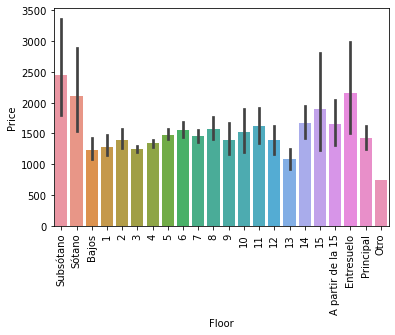

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(y = fotocasa["Price"], x = fotocasa["Floor"].apply(clean_floor),
    order = ["Subsótano","Sótano","Bajos","1","2","3","4","5","6","7","8","9","10","11","12","13","14",
             "15","A partir de la 15","Entresuelo","Principal","Otro"]) 
plt.xticks(rotation=90);

In [42]:
def clean_floor(x):
    try:
        x = x.replace("ª planta","")
        if x in ["1","2","3","4"]:
            return "1-4"
        elif x in ["5","6","7","8","9"]:
            return "5-9"
        elif x in ["10","11","12","13"]:
            return "10-13" 
        elif x in ["14","15"]:
            return "14-15"
        elif x=="A partir de la 15":
            return "+15"
        elif x=="Subsótano":
            return "Sótano"
        else:
            return x
    except AttributeError:
        return x

In [43]:
fotocasa["Floor"] = fotocasa["Floor"].apply(clean_floor)

Imputing the mode does not preserve the distribution. KNN imputer will be used:

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
imputer = Pipeline([('dummy',OneHotEncoder(handle_unknown = "ignore")),
                    ('knc',KNeighborsClassifier(n_neighbors = 5))])

In [45]:
cleaned_columns = list(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0].index)
cleaned_columns.remove("Title")
cleaned_columns.remove("url")
cleaned_columns.remove("Neighborhood")
cleaned_columns.append("Floor")
fotocasa_cleaned = fotocasa[sorted(cleaned_columns)]

In [46]:
filter_miss = fotocasa_cleaned["Floor"].isna()
# Fitting
imputer.fit(fotocasa_cleaned[~filter_miss].drop(["Floor","Price"], axis=1), 
            fotocasa_cleaned.loc[~filter_miss,"Floor"])
pd.options.mode.chained_assignment = None
fotocasa_cleaned.loc[filter_miss.values,"Floor"] = \
    imputer.predict(fotocasa_cleaned[filter_miss].drop(["Floor","Price"], axis=1))

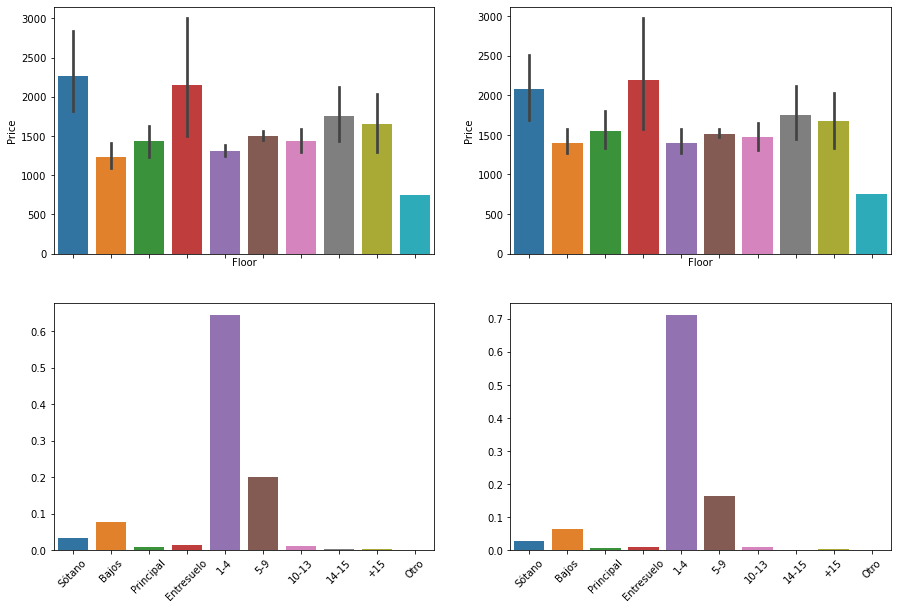

In [47]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10), sharex = True)
sns.barplot(y = fotocasa["Price"], x = fotocasa["Floor"].apply(clean_floor),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-9","10-13","14-15","+15","Otro"],
           ax = ax[0][0]) 
sns.barplot(y = fotocasa_cleaned["Price"], x = fotocasa_cleaned["Floor"].apply(clean_floor),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-9","10-13","14-15","+15","Otro"],
           ax = ax[0][1]) 
sns.barplot(x = fotocasa["Floor"].apply(clean_floor).value_counts().index,
            y = fotocasa["Floor"].apply(clean_floor).value_counts().values/len(fotocasa_cleaned[~filter_miss]),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-9","10-13","14-15","+15","Otro"],
           ax = ax[1][0]) 
sns.barplot(x = fotocasa_cleaned["Floor"].apply(clean_floor).value_counts().index,
            y = fotocasa_cleaned["Floor"].apply(clean_floor).value_counts().values/len(fotocasa_cleaned),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-9","10-13","14-15","+15","Otro"],
           ax = ax[1][1]) 
for i in range(2):
    for tick in ax[1][i].get_xticklabels():
        tick.set_rotation(45)

Good imputing. We observe the same shape distribution in the data withouth replacement than in the data with replacement. 

In [48]:
fotocasa_cleaned.isna().sum()

Air_Conditioner       0
Antiquity             0
Bathrooms             0
Borough               0
Community_Zone        0
Concierge             0
District              0
Elevator              0
Emissions             0
Energy_Consumption    0
Ensuite               0
Equipped_Kitchen      0
Floor                 0
Furnished             0
Garden                0
Len_Extras            0
Photos                0
Price                 0
Rooms                 0
Size                  0
Swimming_Pool         0
Terrace               0
Type                  0
dtype: int64

In [49]:
fotocasa_cleaned.to_csv("fotocasa_cleaned.csv")